Running FFP examples...

1. Calculating single footprint...


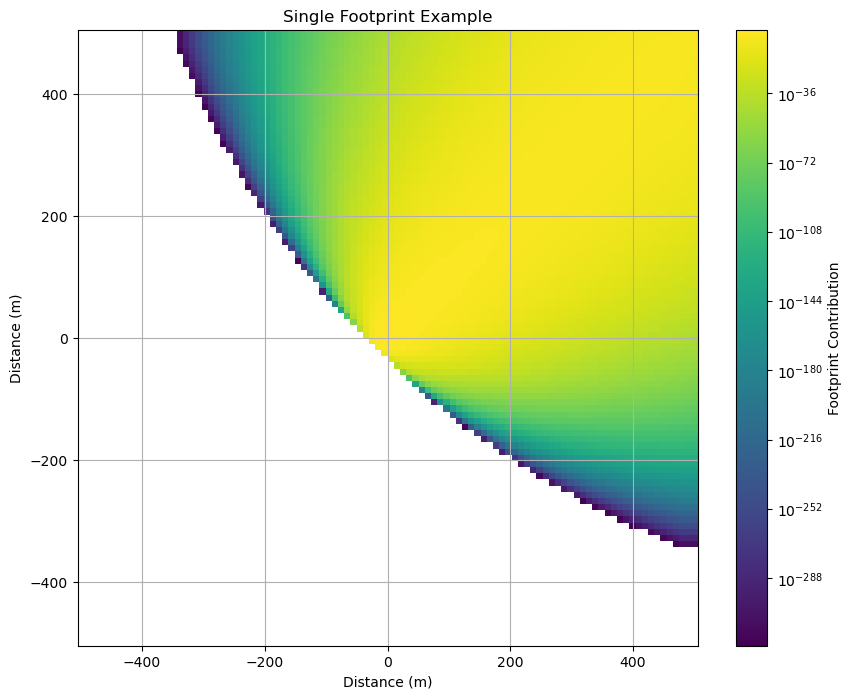


2. Calculating footprint climatology...


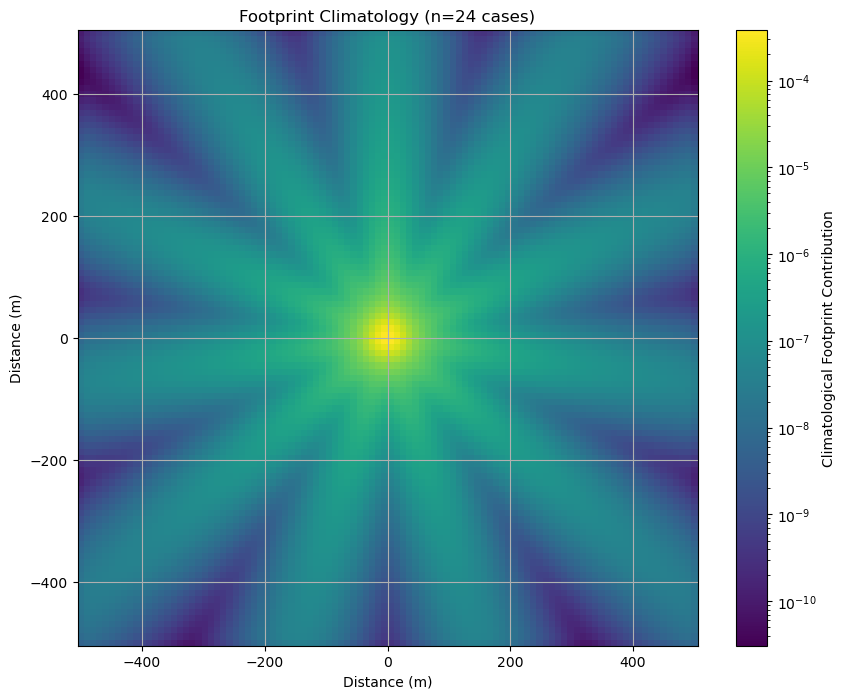


3. Calculating georeferenced footprint...
Error in georeferenced example: For X (0) and Y (0) with flat shading, A should have shape (-1, -1, 3) or (-1, -1, 4) or (-1, -1) or (1,), not (0, 0)
Traceback: Traceback (most recent call last):
  File "C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_42496\4006227927.py", line 128, in georeferenced_example
    plt.pcolormesh(result['x_2d'], result['y_2d'], result['f_2d'], norm=LogNorm())
  File "C:\Users\paulinkenbrandt\Anaconda3\envs\pygis12\Lib\site-packages\matplotlib\pyplot.py", line 3697, in pcolormesh
    __ret = gca().pcolormesh(
            ^^^^^^^^^^^^^^^^^
  File "C:\Users\paulinkenbrandt\Anaconda3\envs\pygis12\Lib\site-packages\matplotlib\__init__.py", line 1473, in inner
    return func(
           ^^^^^
  File "C:\Users\paulinkenbrandt\Anaconda3\envs\pygis12\Lib\site-packages\matplotlib\axes\_axes.py", line 6434, in pcolormesh
    collection = mcoll.QuadMesh(
                 ^^^^^^^^^^^^^^^
  File "C:\Users\paulinkenbran

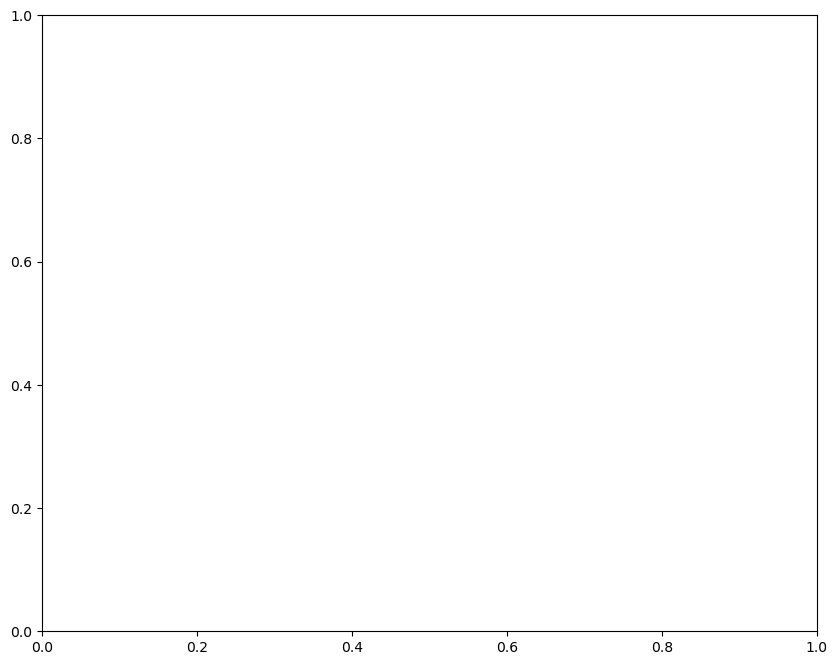

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import traceback
from micromet.ffp import *

# Example 1: Basic Single Footprint Calculation
def basic_footprint_example():
    # Create input parameters
    inputs = FootprintInput(
        zm=3.0,          # Measurement height (m)
        z0=0.1,          # Roughness length (m)
        umean=5.0,       # Mean wind speed (m/s)
        h=1000.0,        # Boundary layer height (m)
        ol=-50.0,        # Obukhov length (m)
        sigmav=0.9,      # Standard deviation of lateral velocity (m/s)
        ustar=0.5,       # Friction velocity (m/s)
        wind_dir=45.0    # Wind direction (degrees)
    )

    # Create calculator and compute footprint
    calculator = FootprintCalculator()
    result = calculator.calculate_footprint(
        inputs,
        domain=(-500, 500, -500, 500),  # Domain bounds: xmin, xmax, ymin, ymax
        nx=100,                         # Grid resolution
        smooth_data=True
    )

    # Plot results
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(result['x_2d'], result['y_2d'], result['f_2d'], norm=LogNorm())
    plt.colorbar(label='Footprint Contribution')
    plt.title('Single Footprint Example')
    plt.xlabel('Distance (m)')
    plt.ylabel('Distance (m)')
    plt.grid(True)
    plt.show()

# Example 2: Footprint Climatology
def climatology_example():
    # Create a series of inputs for different conditions
    input_series = []
    
    # Generate some example variations in wind and stability
    wind_directions = np.linspace(0, 360, 12)  # Monthly wind directions
    for wd in wind_directions:
        inputs = FootprintInput(
            zm=3.0,
            z0=0.1,
            umean=5.0,
            h=1000.0,
            ol=-50.0,  # Unstable conditions
            sigmav=0.9,
            ustar=0.5,
            wind_dir=wd
        )
        input_series.append(inputs)
        
        # Add stable condition case
        stable_inputs = FootprintInput(
            zm=3.0,
            z0=0.1,
            umean=3.0,
            h=800.0,
            ol=50.0,  # Stable conditions
            sigmav=0.6,
            ustar=0.3,
            wind_dir=wd
        )
        input_series.append(stable_inputs)

    # Calculate climatology
    calculator = FootprintCalculator()
    climatology = calculator.calculate_footprint_climatology(
        input_series,
        domain=(-500, 500, -500, 500),
        nx=100,
        smooth_data=True
    )

    # Plot climatology
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(climatology['x_2d'], climatology['y_2d'], 
                  climatology['fclim_2d'], norm=LogNorm())
    plt.colorbar(label='Climatological Footprint Contribution')
    plt.title(f'Footprint Climatology (n={climatology["n"]} cases)')
    plt.xlabel('Distance (m)')
    plt.ylabel('Distance (m)')
    plt.grid(True)
    plt.show()

# Example 3: Georeferenced Footprint with Coordinate System
def georeferenced_example():
    try:
        # Create configuration
        config_dict = {
            'origin_distance': 1000.0,
            'measurement_height': 3.0,
            'roughness_length': 0.1,
            'domain_size': (-1000.0, 1000.0, -1000.0, 1000.0),
            'grid_resolution': 20.0,
            'station_coords': (424000, 4400000),  # Example coordinates in UTM 14N
            'coordinate_system': 'EPSG:32614'  # UTM Zone 14N
        }

        # Create processor with UTM projection
        processor = create_processor_with_crs(config_dict)

        # Create input parameters
        inputs = FootprintInput(
            zm=3.0,
            z0=0.1,
            umean=5.0,
            h=1000.0,
            ol=-50.0,
            sigmav=0.9,
            ustar=0.5,
            wind_dir=45.0
        )

        # Calculate georeferenced footprint
        result = processor.calculate_georeferenced_footprint(inputs)

        # Plot georeferenced result
        plt.figure(figsize=(10, 8))
        plt.pcolormesh(result['x_2d'], result['y_2d'], result['f_2d'], norm=LogNorm())
        plt.colorbar(label='Footprint Contribution')
        plt.plot(config_dict['station_coords'][0], config_dict['station_coords'][1], 
                'r^', markersize=10, label='Station')
        plt.title('Georeferenced Footprint (UTM Zone 14N)')
        plt.xlabel('Easting (m)')
        plt.ylabel('Northing (m)')
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error in georeferenced example: {str(e)}")
        print("Traceback:", traceback.format_exc())

if __name__ == "__main__":
    print("Running FFP examples...")
    
    # Run single footprint example
    print("\n1. Calculating single footprint...")
    basic_footprint_example()
    
    # Run climatology example
    print("\n2. Calculating footprint climatology...")
    climatology_example()
    
    # Run georeferenced example
    print("\n3. Calculating georeferenced footprint...")
    georeferenced_example()

Running FFP examples...

1. Calculating single footprint...


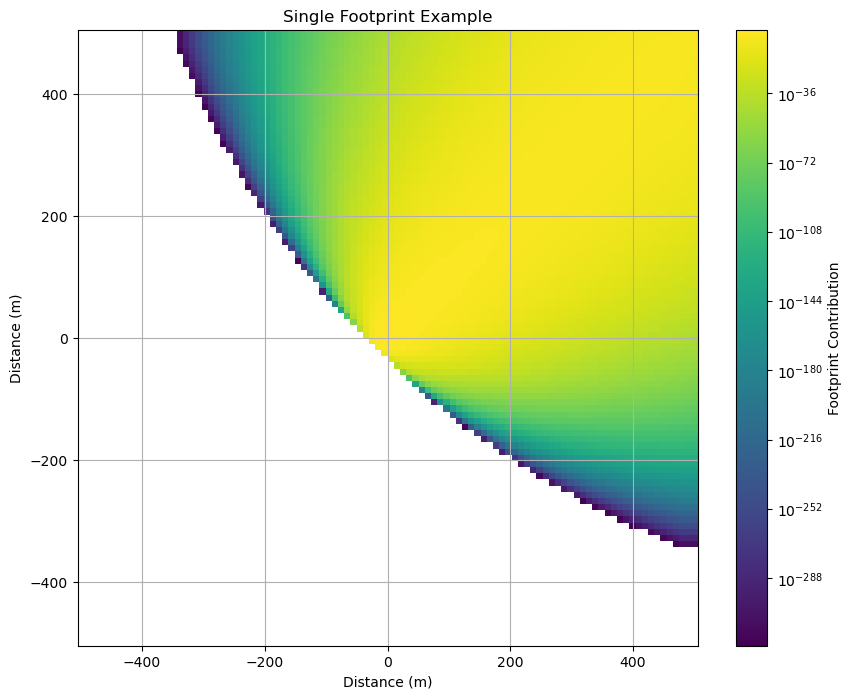


2. Calculating georeferenced footprint...
Calculating footprint...
Error in georeferenced example: Unable to allocate 294. GiB for an array with shape (198800, 198800) and data type float64
Traceback: Traceback (most recent call last):
  File "C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_42496\970619985.py", line 80, in georeferenced_example
    result = processor.calculate_georeferenced_footprint(inputs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\micromet\ffp.py", line 651, in calculate_georeferenced_footprint
    result = self.calculator.calculate_footprint(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\micromet\ffp.py", line 177, in calculate_footprint
    x_2d, y_2d = np.meshgrid(x, y)
                 ^^^^^^^^^^^^^^^^^
  File "C:\Users\paulinkenbrandt\Anaconda3\envs\pygis12\Lib\site-packages\numpy\lib\_function_base_impl.py", l

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import traceback

# Example 1: Basic Single Footprint Calculation (this one works)
def basic_footprint_example():
    # Create input parameters
    inputs = FootprintInput(
        zm=3.0,          # Measurement height (m)
        z0=0.1,          # Roughness length (m)
        umean=5.0,       # Mean wind speed (m/s)
        h=1000.0,        # Boundary layer height (m)
        ol=-50.0,        # Obukhov length (m)
        sigmav=0.9,      # Standard deviation of lateral velocity (m/s)
        ustar=0.5,       # Friction velocity (m/s)
        wind_dir=45.0    # Wind direction (degrees)
    )

    # Create calculator and compute footprint
    calculator = FootprintCalculator()
    result = calculator.calculate_footprint(
        inputs,
        domain=(-500, 500, -500, 500),  # Domain bounds: xmin, xmax, ymin, ymax
        nx=100,                         # Grid resolution
        smooth_data=True
    )

    # Plot results
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(result['x_2d'], result['y_2d'], result['f_2d'], norm=LogNorm())
    plt.colorbar(label='Footprint Contribution')
    plt.title('Single Footprint Example')
    plt.xlabel('Distance (m)')
    plt.ylabel('Distance (m)')
    plt.grid(True)
    plt.show()

# Example 3: Georeferenced Footprint with debugging
def georeferenced_example():
    try:
        # Create configuration with larger domain and explicit grid size
        station_x, station_y = 424000, 4400000  # UTM coordinates
        domain_size = 2000  # meters
        grid_cells = 100    # number of cells in each direction
        
        config_dict = {
            'origin_distance': domain_size/2,
            'measurement_height': 3.0,
            'roughness_length': 0.1,
            'domain_size': (
                station_x - domain_size/2,  # xmin
                station_x + domain_size/2,  # xmax
                station_y - domain_size/2,  # ymin
                station_y + domain_size/2   # ymax
            ),
            'grid_resolution': domain_size/grid_cells,
            'station_coords': (station_x, station_y),
            'coordinate_system': 'EPSG:32614'  # UTM Zone 14N
        }

        # Create processor
        processor = create_processor_with_crs(config_dict)

        # Create input parameters
        inputs = FootprintInput(
            zm=3.0,
            z0=0.1,
            umean=5.0,
            h=1000.0,
            ol=-50.0,
            sigmav=0.9,
            ustar=0.5,
            wind_dir=45.0
        )

        # Calculate georeferenced footprint with debug prints
        print("Calculating footprint...")
        result = processor.calculate_georeferenced_footprint(inputs)
        
        # Debug prints
        print(f"Result keys: {result.keys()}")
        print(f"x_2d shape: {result['x_2d'].shape}")
        print(f"y_2d shape: {result['y_2d'].shape}")
        print(f"f_2d shape: {result['f_2d'].shape}")
        print(f"x_2d range: {np.min(result['x_2d'])} to {np.max(result['x_2d'])}")
        print(f"y_2d range: {np.min(result['y_2d'])} to {np.max(result['y_2d'])}")
        
        # Check for valid data
        if result['f_2d'].size == 0:
            raise ValueError("Footprint calculation returned empty array")
        
        if np.all(np.isnan(result['f_2d'])):
            raise ValueError("Footprint calculation returned all NaN values")

        # Plot georeferenced result
        plt.figure(figsize=(10, 8))
        
        # Create mask for zero values to avoid LogNorm issues
        mask = result['f_2d'] > 0
        masked_footprint = np.ma.masked_where(~mask, result['f_2d'])
        
        plt.pcolormesh(result['x_2d'], result['y_2d'], masked_footprint, 
                      norm=LogNorm(vmin=np.min(result['f_2d'][mask]), 
                                 vmax=np.max(result['f_2d'][mask])))
        
        plt.colorbar(label='Footprint Contribution')
        plt.plot(station_x, station_y, 'r^', markersize=10, label='Station')
        
        # Add buffer around the domain for better visibility
        buffer = domain_size * 0.1
        plt.xlim(station_x - domain_size/2 - buffer, station_x + domain_size/2 + buffer)
        plt.ylim(station_y - domain_size/2 - buffer, station_y + domain_size/2 + buffer)
        
        plt.title('Georeferenced Footprint (UTM Zone 14N)')
        plt.xlabel('Easting (m)')
        plt.ylabel('Northing (m)')
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error in georeferenced example: {str(e)}")
        print("Traceback:", traceback.format_exc())

if __name__ == "__main__":
    print("Running FFP examples...")
    
    # Run single footprint example
    print("\n1. Calculating single footprint...")
    basic_footprint_example()
    
    # Run georeferenced example with debugging
    print("\n2. Calculating georeferenced footprint...")
    georeferenced_example()

Running FFP examples...

1. Calculating single footprint...


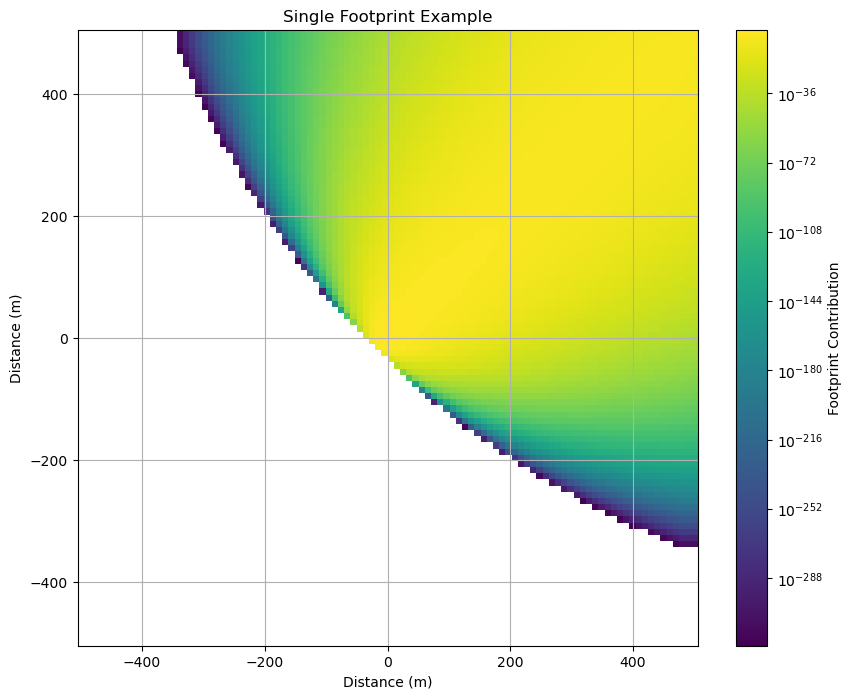


2. Calculating georeferenced footprint...
Configuration:
Domain size: (-500.0, 500.0, -500.0, 500.0)
Grid resolution: 10.0
Expected grid cells: 100 x 100

Calculating footprint...

Result info:
x_2d shape: (0, 0)
y_2d shape: (0, 0)
f_2d shape: (0, 0)
Error in georeferenced example: zero-size array to reduction operation minimum which has no identity
Traceback: Traceback (most recent call last):
  File "C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_42496\1417924398.py", line 91, in georeferenced_example
    print(f"x_2d range: {np.min(result['x_2d'])} to {np.max(result['x_2d'])}")
                         ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\paulinkenbrandt\Anaconda3\envs\pygis12\Lib\site-packages\numpy\_core\fromnumeric.py", line 3042, in min
    return _wrapreduction(a, np.minimum, 'min', axis, None, out,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\paulinkenbrandt\Anaconda3\envs\pygis12\Lib\site-packages\numpy\_core\fromnumeric.py", 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import traceback

def basic_footprint_example():
    # Create input parameters
    inputs = FootprintInput(
        zm=3.0,          # Measurement height (m)
        z0=0.1,          # Roughness length (m)
        umean=5.0,       # Mean wind speed (m/s)
        h=1000.0,        # Boundary layer height (m)
        ol=-50.0,        # Obukhov length (m)
        sigmav=0.9,      # Standard deviation of lateral velocity (m/s)
        ustar=0.5,       # Friction velocity (m/s)
        wind_dir=45.0    # Wind direction (degrees)
    )

    # Create calculator and compute footprint
    calculator = FootprintCalculator()
    result = calculator.calculate_footprint(
        inputs,
        domain=(-500, 500, -500, 500),  # Domain bounds: xmin, xmax, ymin, ymax
        nx=100,                         # Grid resolution
        smooth_data=True
    )

    # Plot results
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(result['x_2d'], result['y_2d'], result['f_2d'], norm=LogNorm())
    plt.colorbar(label='Footprint Contribution')
    plt.title('Single Footprint Example')
    plt.xlabel('Distance (m)')
    plt.ylabel('Distance (m)')
    plt.grid(True)
    plt.show()

def georeferenced_example():
    try:
        # Set up grid parameters
        grid_cells = 100    # number of cells in each direction
        domain_size = 1000  # meters (relative to station)
        
        # Calculate relative domain (centered on 0,0)
        relative_domain = (-domain_size/2, domain_size/2, -domain_size/2, domain_size/2)
        
        # Station coordinates in UTM
        station_x, station_y = 424000, 4400000
        
        # Create configuration
        config_dict = {
            'origin_distance': domain_size/2,
            'measurement_height': 3.0,
            'roughness_length': 0.1,
            'domain_size': relative_domain,  # Use relative domain
            'grid_resolution': domain_size/grid_cells,
            'station_coords': (station_x, station_y),
            'coordinate_system': 'EPSG:32614'  # UTM Zone 14N
        }

        print("Configuration:")
        print(f"Domain size: {config_dict['domain_size']}")
        print(f"Grid resolution: {config_dict['grid_resolution']}")
        print(f"Expected grid cells: {grid_cells} x {grid_cells}")

        # Create processor
        processor = create_processor_with_crs(config_dict)

        # Create input parameters
        inputs = FootprintInput(
            zm=3.0,
            z0=0.1,
            umean=5.0,
            h=1000.0,
            ol=-50.0,
            sigmav=0.9,
            ustar=0.5,
            wind_dir=45.0
        )

        # Calculate georeferenced footprint
        print("\nCalculating footprint...")
        result = processor.calculate_georeferenced_footprint(inputs)
        
        # Debug prints
        print("\nResult info:")
        print(f"x_2d shape: {result['x_2d'].shape}")
        print(f"y_2d shape: {result['y_2d'].shape}")
        print(f"f_2d shape: {result['f_2d'].shape}")
        print(f"x_2d range: {np.min(result['x_2d'])} to {np.max(result['x_2d'])}")
        print(f"y_2d range: {np.min(result['y_2d'])} to {np.max(result['y_2d'])}")

        # Check for valid data
        if result['f_2d'].size == 0:
            raise ValueError("Footprint calculation returned empty array")
        
        if np.all(np.isnan(result['f_2d'])):
            raise ValueError("Footprint calculation returned all NaN values")

        # Plot georeferenced result
        plt.figure(figsize=(10, 8))
        
        # Create mask for zero values
        mask = result['f_2d'] > 0
        masked_footprint = np.ma.masked_where(~mask, result['f_2d'])
        
        plt.pcolormesh(result['x_2d'], result['y_2d'], masked_footprint, 
                      norm=LogNorm(vmin=np.min(result['f_2d'][mask]), 
                                 vmax=np.max(result['f_2d'][mask])))
        
        plt.colorbar(label='Footprint Contribution')
        plt.plot(station_x, station_y, 'r^', markersize=10, label='Station')
        
        # Add buffer around the domain for better visibility
        buffer = domain_size * 0.1
        plt.xlim(station_x - domain_size/2 - buffer, station_x + domain_size/2 + buffer)
        plt.ylim(station_y - domain_size/2 - buffer, station_y + domain_size/2 + buffer)
        
        plt.title('Georeferenced Footprint (UTM Zone 14N)')
        plt.xlabel('Easting (m)')
        plt.ylabel('Northing (m)')
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error in georeferenced example: {str(e)}")
        print("Traceback:", traceback.format_exc())

if __name__ == "__main__":
    print("Running FFP examples...")
    
    # Run single footprint example
    print("\n1. Calculating single footprint...")
    basic_footprint_example()
    
    # Run georeferenced example
    print("\n2. Calculating georeferenced footprint...")
    georeferenced_example()

Running FFP examples...

1. Calculating single footprint...


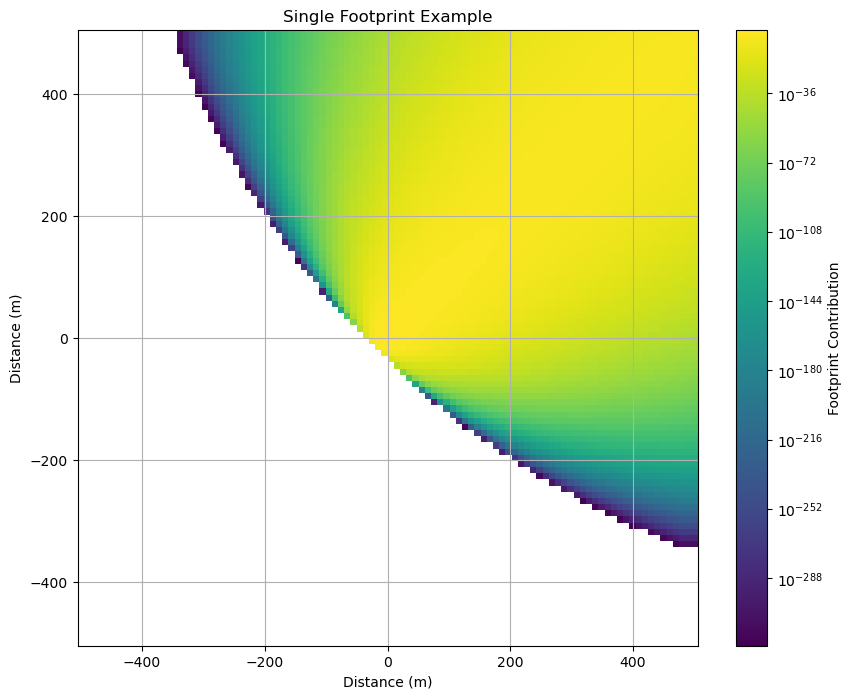


2. Calculating georeferenced footprint...
Testing basic footprint calculation...
Test calculation successful. Array shapes:
Test x_2d shape: (100, 100)
Test f_2d shape: (100, 100)

Configuration:
origin_distance: 500.0
measurement_height: 3.0
roughness_length: 0.1
domain_size: (423500.0, 424500.0, 4399500.0, 4400500.0)
grid_resolution: 10.0
station_coords: (424000, 4400000)
coordinate_system: EPSG:32614

Creating processor...

Calculating georeferenced footprint...
Error in georeferenced example: Unable to allocate 1.15 TiB for an array with shape (397600, 397600) and data type float64
Traceback: Traceback (most recent call last):
  File "C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_42496\2125971001.py", line 102, in georeferenced_example
    result = processor.calculate_georeferenced_footprint(inputs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\micromet\ffp.py", line 651, in calculate_georefere

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import traceback

def basic_footprint_example():
    # Create input parameters
    inputs = FootprintInput(
        zm=3.0,          # Measurement height (m)
        z0=0.1,          # Roughness length (m)
        umean=5.0,       # Mean wind speed (m/s)
        h=1000.0,        # Boundary layer height (m)
        ol=-50.0,        # Obukhov length (m)
        sigmav=0.9,      # Standard deviation of lateral velocity (m/s)
        ustar=0.5,       # Friction velocity (m/s)
        wind_dir=45.0    # Wind direction (degrees)
    )

    # Create calculator and compute footprint
    calculator = FootprintCalculator()
    result = calculator.calculate_footprint(
        inputs,
        domain=(-500, 500, -500, 500),  # Domain bounds: xmin, xmax, ymin, ymax
        nx=100,                         # Grid resolution
        smooth_data=True
    )

    # Plot results
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(result['x_2d'], result['y_2d'], result['f_2d'], norm=LogNorm())
    plt.colorbar(label='Footprint Contribution')
    plt.title('Single Footprint Example')
    plt.xlabel('Distance (m)')
    plt.ylabel('Distance (m)')
    plt.grid(True)
    plt.show()

def georeferenced_example():
    try:
        # First create a basic calculator to test the footprint calculation
        print("Testing basic footprint calculation...")
        basic_calc = FootprintCalculator()
        test_inputs = FootprintInput(
            zm=3.0,
            z0=0.1,
            umean=5.0,
            h=1000.0,
            ol=-50.0,
            sigmav=0.9,
            ustar=0.5,
            wind_dir=45.0
        )
        
        # Test calculation with simple domain
        test_result = basic_calc.calculate_footprint(
            test_inputs,
            domain=(-500, 500, -500, 500),
            nx=100,
            smooth_data=True
        )
        
        print(f"Test calculation successful. Array shapes:")
        print(f"Test x_2d shape: {test_result['x_2d'].shape}")
        print(f"Test f_2d shape: {test_result['f_2d'].shape}")
        
        # Now set up the georeferenced calculation
        # Station coordinates in UTM Zone 14N
        station_x, station_y = 424000, 4400000
        
        # Create the domain centered on the station
        domain_size = 1000  # meters
        xmin = station_x - domain_size/2
        xmax = station_x + domain_size/2
        ymin = station_y - domain_size/2
        ymax = station_y + domain_size/2
        
        # Create configuration with absolute coordinates
        config_dict = {
            'origin_distance': domain_size/2,
            'measurement_height': 3.0,
            'roughness_length': 0.1,
            'domain_size': (xmin, xmax, ymin, ymax),
            'grid_resolution': 10.0,  # 10 meter resolution
            'station_coords': (station_x, station_y),
            'coordinate_system': 'EPSG:32614'  # UTM Zone 14N
        }

        print("\nConfiguration:")
        for key, value in config_dict.items():
            print(f"{key}: {value}")

        # Create processor
        print("\nCreating processor...")
        processor = create_processor_with_crs(config_dict)

        # Create input parameters (same as test calculation)
        inputs = test_inputs

        # Calculate georeferenced footprint
        print("\nCalculating georeferenced footprint...")
        result = processor.calculate_georeferenced_footprint(inputs)
        
        # Verify result contents
        print("\nResult contents:")
        for key in result:
            if isinstance(result[key], np.ndarray):
                print(f"{key}: shape {result[key].shape}, dtype {result[key].dtype}")
                if result[key].size > 0:
                    print(f"    range: {np.min(result[key])} to {np.max(result[key])}")

        # Check for valid data
        if result['f_2d'].size == 0:
            raise ValueError("Footprint calculation returned empty array")
        
        if np.all(np.isnan(result['f_2d'])):
            raise ValueError("Footprint calculation returned all NaN values")

        # Plot georeferenced result
        plt.figure(figsize=(10, 8))
        
        # Create mask for zero values
        mask = result['f_2d'] > 0
        if np.any(mask):
            masked_footprint = np.ma.masked_where(~mask, result['f_2d'])
            
            plt.pcolormesh(result['x_2d'], result['y_2d'], masked_footprint, 
                          norm=LogNorm(vmin=np.min(result['f_2d'][mask]), 
                                     vmax=np.max(result['f_2d'][mask])))
            
            plt.colorbar(label='Footprint Contribution')
        else:
            print("Warning: No positive values in footprint array")

        # Plot station location
        plt.plot(station_x, station_y, 'r^', markersize=10, label='Station')
        
        # Set plot limits
        buffer = domain_size * 0.1
        plt.xlim(xmin - buffer, xmax + buffer)
        plt.ylim(ymin - buffer, ymax + buffer)
        
        plt.title('Georeferenced Footprint (UTM Zone 14N)')
        plt.xlabel('Easting (m)')
        plt.ylabel('Northing (m)')
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error in georeferenced example: {str(e)}")
        print("Traceback:", traceback.format_exc())

if __name__ == "__main__":
    print("Running FFP examples...")
    
    # Run single footprint example
    print("\n1. Calculating single footprint...")
    basic_footprint_example()
    
    # Run georeferenced example
    print("\n2. Calculating georeferenced footprint...")
    georeferenced_example()

Running FFP example...
Setting up calculation...

Calculating footprint in local coordinates...
Local calculation successful. Array shapes:
x_2d shape: (100, 100)
f_2d shape: (100, 100)

Coordinate ranges:
X range: 423500.0 to 424500.0
Y range: 4399500.0 to 4400500.0


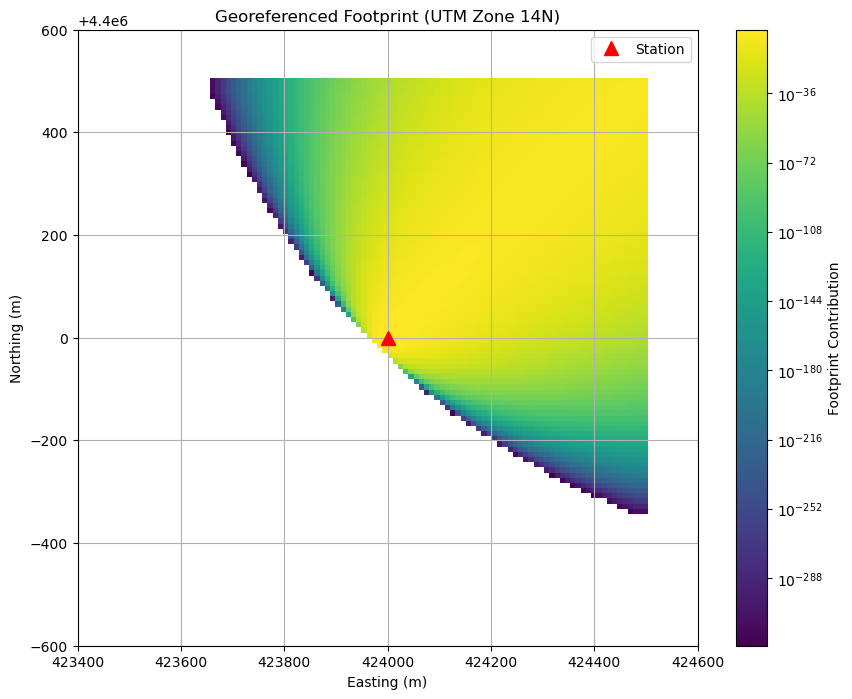


Footprint statistics:
Maximum contribution: 1.12e-03
Mean contribution: 1.13e-06
Total contribution: 1.13e-02


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import traceback

def georeferenced_example():
    try:
        # First create a basic calculator for the footprint
        print("Setting up calculation...")
        calculator = FootprintCalculator()
        
        # Set up the local domain (centered on 0,0)
        domain_size = 1000  # meters
        nx = 100           # number of grid points in each direction
        local_domain = (-domain_size/2, domain_size/2, -domain_size/2, domain_size/2)
        
        # Create input parameters
        inputs = FootprintInput(
            zm=3.0,
            z0=0.1,
            umean=5.0,
            h=1000.0,
            ol=-50.0,
            sigmav=0.9,
            ustar=0.5,
            wind_dir=45.0
        )
        
        # Calculate footprint in local coordinates
        print("\nCalculating footprint in local coordinates...")
        result = calculator.calculate_footprint(
            inputs,
            domain=local_domain,
            nx=nx,
            smooth_data=True
        )
        
        print(f"Local calculation successful. Array shapes:")
        print(f"x_2d shape: {result['x_2d'].shape}")
        print(f"f_2d shape: {result['f_2d'].shape}")
        
        # Now transform to UTM coordinates
        # Station coordinates in UTM Zone 14N
        station_x, station_y = 424000, 4400000
        
        # Transform the local coordinates to UTM by adding station coordinates
        x_utm = result['x_2d'] + station_x
        y_utm = result['y_2d'] + station_y
        
        print("\nCoordinate ranges:")
        print(f"X range: {np.min(x_utm)} to {np.max(x_utm)}")
        print(f"Y range: {np.min(y_utm)} to {np.max(y_utm)}")

        # Plot georeferenced result
        plt.figure(figsize=(10, 8))
        
        # Create mask for zero values
        mask = result['f_2d'] > 0
        if np.any(mask):
            masked_footprint = np.ma.masked_where(~mask, result['f_2d'])
            
            plt.pcolormesh(x_utm, y_utm, masked_footprint, 
                          norm=LogNorm(vmin=np.min(result['f_2d'][mask]), 
                                     vmax=np.max(result['f_2d'][mask])))
            
            plt.colorbar(label='Footprint Contribution')
        else:
            print("Warning: No positive values in footprint array")

        # Plot station location
        plt.plot(station_x, station_y, 'r^', markersize=10, label='Station')
        
        # Set plot limits
        buffer = domain_size * 0.1
        plt.xlim(station_x - domain_size/2 - buffer, station_x + domain_size/2 + buffer)
        plt.ylim(station_y - domain_size/2 - buffer, station_y + domain_size/2 + buffer)
        
        plt.title('Georeferenced Footprint (UTM Zone 14N)')
        plt.xlabel('Easting (m)')
        plt.ylabel('Northing (m)')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Optional: Print statistics about the footprint
        print("\nFootprint statistics:")
        print(f"Maximum contribution: {np.max(result['f_2d']):.2e}")
        print(f"Mean contribution: {np.mean(result['f_2d']):.2e}")
        print(f"Total contribution: {np.sum(result['f_2d']):.2e}")

    except Exception as e:
        print(f"Error in georeferenced example: {str(e)}")
        print("Traceback:", traceback.format_exc())

if __name__ == "__main__":
    print("Running FFP example...")
    georeferenced_example()